# **Trends and Demographics of Graduate Education in Canada: Insights into Age, Gender, and Educational Qualification"**


## Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Loading the dataset
df = pd.read_csv("37100114.csv")
df.tail(3)

,REF_DATE,GEO,DGUID,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,...,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1048572,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian and international students,"Graduates reporting wages, salaries and commis...",Median employment income,...,439,units,0,v1011472164,5.11.16.2.1.1.5.2,60900.0,NaN,NaN,NaN,0
1048573,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian students,All graduates,Number of graduates,...,223,units,0,v1011472165,5.11.16.2.1.2.1.1,180.0,NaN,NaN,NaN,0
1048574,2012,New Brunswick,2016A000213,Undergraduate degree,Social and behavioural sciences and law [4],Man,15 to 64 years,Canadian students,Graduates with no income information,Number of graduates,...,223,units,0,v1011472166,5.11.16.2.1.2.2.1,0.0,NaN,NaN,NaN,0


## PART 1

### Q5: What cleanup was required in your dataset? Determine how to handle the missing values for your dataset.

In [66]:
# Geting unique values in each column
for column in df.columns:
    unique_values = df[column].unique()

    print(f"\nUnique values in {column}:")
    print(unique_values)
    print(f"Number of unique values: {len(unique_values)}")


Unique values in REF_DATE:
[2010 2011 2012]
Number of unique values: 3

Unique values in GEO:
['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']
Number of unique values: 11

Unique values in DGUID:
['2016A11124' '2016A000210' '2016A000211' '2016A000212' '2016A000213'
 '2016A000224' '2016A000235' '2016A000246' '2016A000247' '2016A000248'
 '2016A000259']
Number of unique values: 11

Unique values in Educational qualification:
['Total, educational qualification'
 'Career, technical or professional training short credential'
 'Career, technical or professional training certificate'
 'Career, technical or professional training diploma'
 'Other career, technical or professional training credential'
 'Post career, technical or professional training program certificate'
 'Post career, technical or professional training program diploma'
 'Pre-university certificate' 'Undergradua

Based on the unique values of the features in the dataset, I saw the need to remove the following features:

1. **VECTOR**: Contains unique identifiers (e.g., `v1010569488`) that do not provide useful information for analysis.
2. **COORDINATE**: Includes unique coordinate identifiers (e.g., `1.1.1.1.1.1.1.1`) that are not relevant to the analysis of educational qualifications, labor market trends, or demographic data.
3. **SYMBOL**: Contains only `nan` values, indicating missing or irrelevant data.
4. **TERMINATED**: Contains only `nan` values, implying no meaningful data is present.
5. **DECIMALS**: Contains only a constant value (`0`), which does not add any value to the analysis.
6. **STATUS**: Includes values such as `nan`, `..`, and `x`, which likely represent placeholders or missing data, making this column irrelevant.
7. **DGUID**: Appears to be a unique identifier for records and does not provide meaningful insights into educational qualifications, employment outcomes, or demographic trends.
8. **SCALAR FACTOR**: It has only one value across that is 'units'
9. **SCALAR_ID**: It has only one value across that is 0

These columns do not contribute valuable information and can be safely removed to focus the analysis on more relevant data.


In [67]:
# List of columns to remove
columns_to_remove = [
    'VECTOR', 
    'COORDINATE', 
    'SYMBOL', 
    'TERMINATED', 
    'DECIMALS', 
    'STATUS', 
    'DGUID',
    'SCALAR_FACTOR',
    'SCALAR_ID'
]

# Remove the specified columns
df_dropped = df.drop(columns=columns_to_remove)

# Verify the removal by checking the remaining columns
print(df_dropped.columns)


Index(['REF_DATE', 'GEO', 'Educational qualification', 'Field of study',
       'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'VALUE'],
      dtype='object')


In [68]:
# Getting top 3 rows after cleaning
df_dropped.head(3)

,REF_DATE,GEO,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,UOM,UOM_ID,VALUE
0,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,Number,223,321590.0
1,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,Number,223,40400.0
2,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,Number,223,30620.0


In [69]:
# Geting the shape of the dataset
df_dropped.shape

(1048575, 12)

In [70]:
# Checking for missing values in each column after dropping irrelevant columns
missing_values = df_dropped.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)


Columns with missing values:
 VALUE    189718
dtype: int64


I handled the missing values by dropping them

In [71]:
# Separating the rows with missing and non-missing values in the 'VALUE' column
missing_values_rows = df_dropped[df_dropped['VALUE'].isnull()]
non_missing_values_rows = df_dropped[df_dropped['VALUE'].notnull()]

In [72]:
# Geting summary statistics for missing values
missing_summary = missing_values_rows.describe()
missing_summary

,REF_DATE,UOM_ID,VALUE
count,189718.000000,189718.000000,0.0
mean,2010.787068,411.397432,NaN
std,0.710990,72.112969,NaN
min,2010.000000,223.000000,NaN
25%,2010.000000,439.000000,NaN
50%,2011.000000,439.000000,NaN
75%,2011.000000,439.000000,NaN
max,2012.000000,439.000000,NaN


In [73]:
# Geting summary statistics for non missing values
non_missing_summary = non_missing_values_rows.describe()
non_missing_summary

,REF_DATE,UOM_ID,VALUE
count,858857.000000,858857.000000,858857.000000
mean,2010.763824,250.365897,8887.605096
std,0.721338,71.848086,24301.011319
min,2010.000000,223.000000,0.000000
25%,2010.000000,223.000000,0.000000
50%,2011.000000,223.000000,20.000000
75%,2011.000000,223.000000,180.000000
max,2012.000000,439.000000,345860.000000


In [74]:
df_dropped.isnull().sum()

REF_DATE                                 0
GEO                                      0
Educational qualification                0
Field of study                           0
Gender                                   0
Age group                                0
Status of student in Canada              0
Characteristics after graduation         0
Graduate statistics                      0
UOM                                      0
UOM_ID                                   0
VALUE                               189718
dtype: int64

In [75]:
# Checking for missing values in each column
missing_values = df_dropped.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)


Columns with missing values:
 VALUE    189718
dtype: int64


The only missing values are found in the Value Column

In [76]:
# Droping rows with missing values in the 'VALUE' column
df_cleaned = df_dropped.dropna(subset=['VALUE'])

In [77]:
# Checking for missing values after dropping the missing values
missing_values_after = df_cleaned.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]
print("\nColumns with missing values after dropping:\n", missing_values_after)


Columns with missing values after dropping:
 Series([], dtype: int64)


In [78]:
# Display the shape of the dataset before and after
print("\nShape before dropping rows with missing 'VALUE':", df_dropped.shape)
print("Shape after dropping rows with missing 'VALUE':", df_cleaned.shape)


Shape before dropping rows with missing 'VALUE': (1048575, 12)
Shape after dropping rows with missing 'VALUE': (858857, 12)


In [79]:
# Check initial shape of the data
print("Original data shape:", df.shape)

# Removing columns
df_removed = df.drop(columns=columns_to_remove)
print("Shape after removing columns:", df_removed.shape)

# Droping rows with missing 'VALUE'
df_value_dropped = df_removed.dropna(subset=['VALUE'])
print("Shape after dropping rows with missing 'VALUE':", df_value_dropped.shape)

# Droping rows with missing categorical values
categorical_columns = ['Age group', 'Educational qualification', 'Gender', 'Status of student in Canada']

df_final = df_value_dropped.dropna(subset=categorical_columns)
print("Shape after dropping missing values in categorical columns:", df_final.shape)

# Ensuring valid numerical values
df_final = df_final[df_final['VALUE'] > 0]
print("Shape after filtering 'VALUE' > 0:", df_final.shape)

# Final cleaned data
print("Final cleaned data shape:", df_final.shape)


Original data shape: (1048575, 21)
Shape after removing columns: (1048575, 12)
Shape after dropping rows with missing 'VALUE': (858857, 12)
Shape after dropping missing values in categorical columns: (858857, 12)
Shape after filtering 'VALUE' > 0: (602910, 12)
Final cleaned data shape: (602910, 12)


### Q6: Create a function that accepts the raw data after it has been loaded and returns the cleaned-up data.

In [80]:
def clean_data(data):
    """
    Cleans the input dataset by handling missing values in critical columns 
    and ensuring valid data for analysis.
    
    Args:
        data (DataFrame): The raw dataset.
        
    Returns:
        DataFrame: The cleaned dataset.
    """
    # List of columns to remove
    columns_to_remove = [
        'VECTOR', 
        'COORDINATE', 
        'SYMBOL', 
        'TERMINATED', 
        'DECIMALS', 
        'STATUS', 
        'DGUID',
        'SCALAR_FACTOR',
        'SCALAR_ID'
    ]
    
    # Remove the specified columns
    data_cleaned = data.drop(columns=columns_to_remove)
    
    # Drop rows with missing values in the 'VALUE' column
    data_cleaned = data_cleaned.dropna(subset=['VALUE'])
    
    # Drop rows with missing values in categorical columns
    #categorical_columns = ['Age group', 'Educational qualification', 'Gender', 'Status of student in Canada']
    #data_cleaned = data_cleaned.dropna(subset=categorical_columns)
    
    # Ensure all numerical columns have valid data
    data_cleaned = data_cleaned[data_cleaned['VALUE'] > 0]  # Remove invalid or negative values
    
    return data_cleaned

# Apply the cleaning function
df_cleaned = clean_data(df)

# Check the shape of the cleaned data
print(df_cleaned.shape)

# Verify the cleaned data
df_cleaned.head()


(602910, 12)


,REF_DATE,GEO,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,UOM,UOM_ID,VALUE
0,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,Number,223,321590.0
1,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,Number,223,40400.0
2,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,Number,223,30620.0
3,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates reporting employment income,Number of graduates,Number,223,250560.0
4,2010,Canada,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,"Graduates reporting wages, salaries and commis...",Number of graduates,Number,223,218490.0


### Q4: Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights. Why?


- Government Agencies and Educational Institutions:
The parties can be Governement bodies, Ministry of Education, Public Universities, and colleges


Policy Planning and Analysis: Government agencies responsible for education policy could use this dataset to understand trends in the educational status of students in Canada. For instance, tracking graduation rates, enrollment numbers, and demographic factors (e.g., age group, gender, and educational qualifications) can help shape policies aimed at improving the educational system.


Resource Allocation: Universities and colleges can analyze these insights to optimize resource distribution, such as tailoring programs to the specific needs of different age groups or genders and ensuring adequate support for graduation programs.


Monitoring Educational Trends: Insights into student numbers and qualifications can help in identifying areas of growth or need in the education system (e.g., regions or demographics with lower graduation rates).

-  Research Institutions
Parties such as Research organizations, Academic Research Centers, Non-profit organizations focusing on education

Education Research: Academic institutions conducting research in education would be keen to explore the trends in graduation rates, demographic influences, and how these might correlate with other factors like economic background or regional differences.

Social Impact Studies: Think tanks or non-profit organizations focused on social issues might be interested in how educational attainment affects social mobility or access to further opportunities in Canada. They may use the insights to advocate for improvements in the education system, particularly in underserved areas.

Research groups focused on reducing educational inequality could use the dataset to uncover potential disparities between gender, age groups, or geographic locations, which could inform their advocacy work.

- Employers and Recruitment Agencies
Workforce Planning: Employers and recruitment agencies may use insights from the dataset to understand the educational qualifications of the emerging workforce. For example, trends in graduate numbers could guide hiring decisions, especially in fields that require higher education.


Companies that offer educational products, such as tutoring or training services, might use this dataset to identify target markets. They could use demographic information to tailor their offerings to students in need of specific skill sets.


Job Market Trends: Employers may also use trends in educational qualifications to assess the availability of qualified candidates in the job market. A rise in graduates in a specific field might suggest an oversupply or undersupply of certain skills.

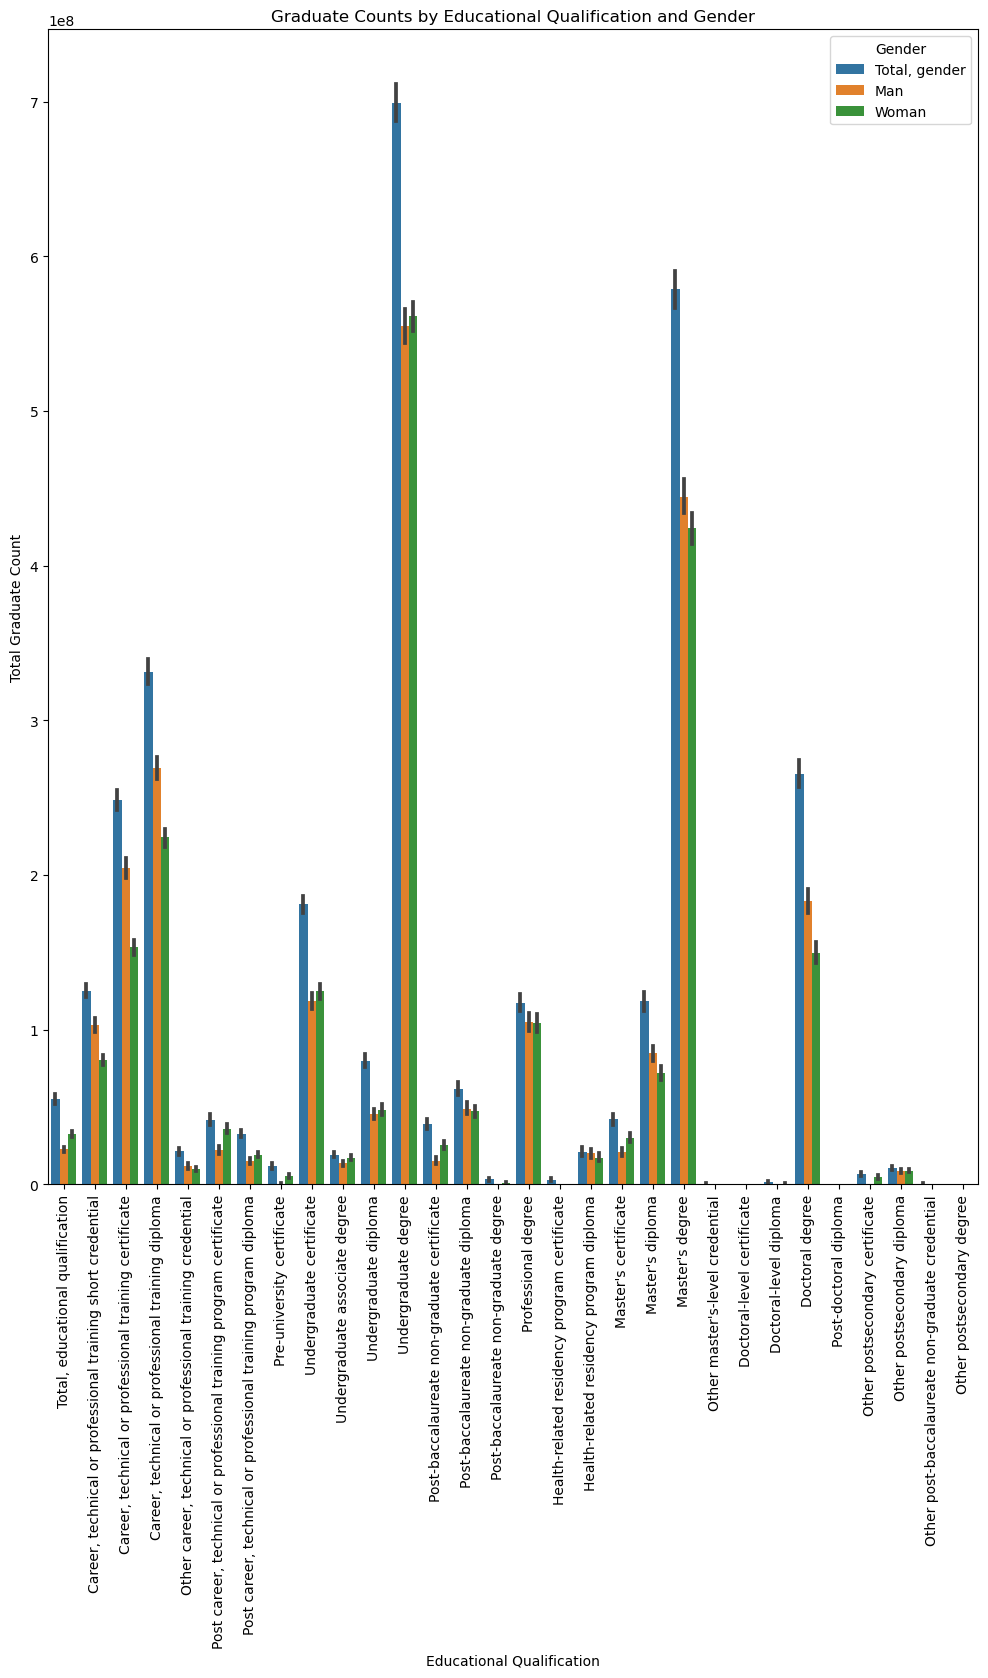

In [81]:
# For example, visualization for policy makers:
plt.figure(figsize=(12, 15))
sns.barplot(data=df_cleaned, x='Educational qualification', y='VALUE', hue='Gender', estimator=sum)
plt.title('Graduate Counts by Educational Qualification and Gender')
plt.xlabel('Educational Qualification')
plt.ylabel('Total Graduate Count')
plt.xticks(rotation=90)
plt.show()


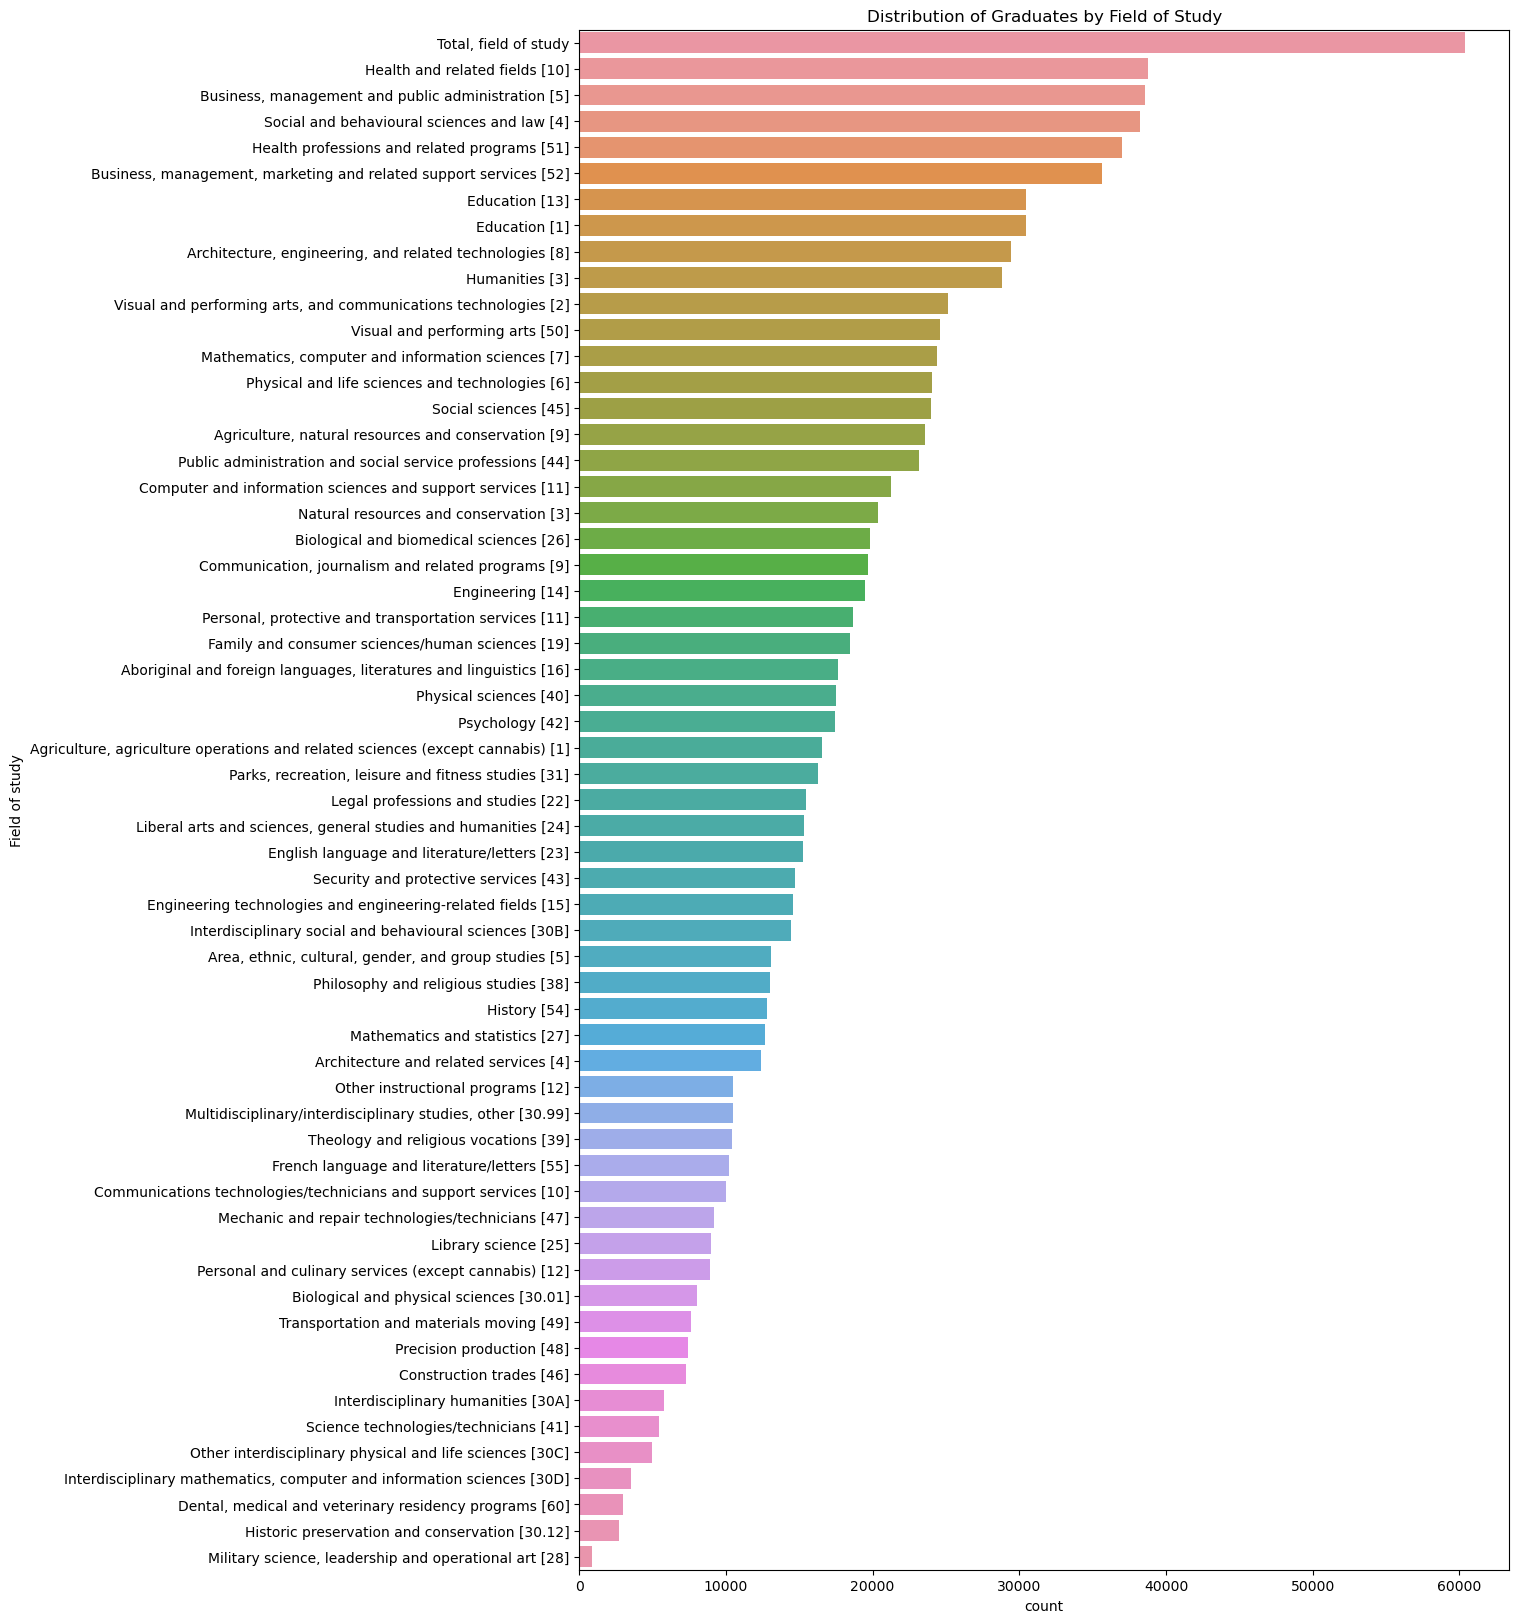

In [82]:
# Field of Study distribution
plt.figure(figsize=(12, 20))
sns.countplot(data=df, y='Field of study', order=df['Field of study'].value_counts().index)
plt.title('Distribution of Graduates by Field of Study')
plt.show()


<Figure size 1200x600 with 0 Axes>

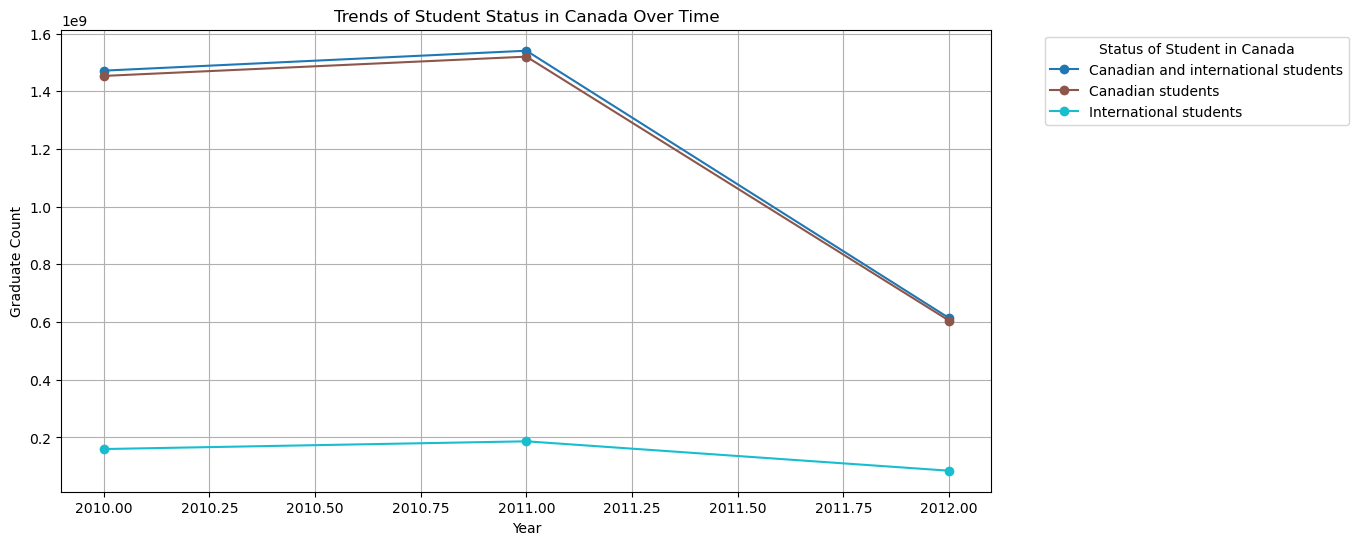

In [83]:
# Plotting graduation trends over time

status_trends = df_cleaned.groupby(['REF_DATE', 'Status of student in Canada'])['VALUE'].sum().unstack()

# Line plot
plt.figure(figsize=(12, 6))
status_trends.plot(kind='line', marker='o', figsize=(12, 6), cmap='tab10')

plt.title('Trends of Student Status in Canada Over Time')
plt.xlabel('Year')
plt.ylabel('Graduate Count')
plt.legend(title='Status of Student in Canada', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


valuable for both government agencies and employers to track the trends in education.

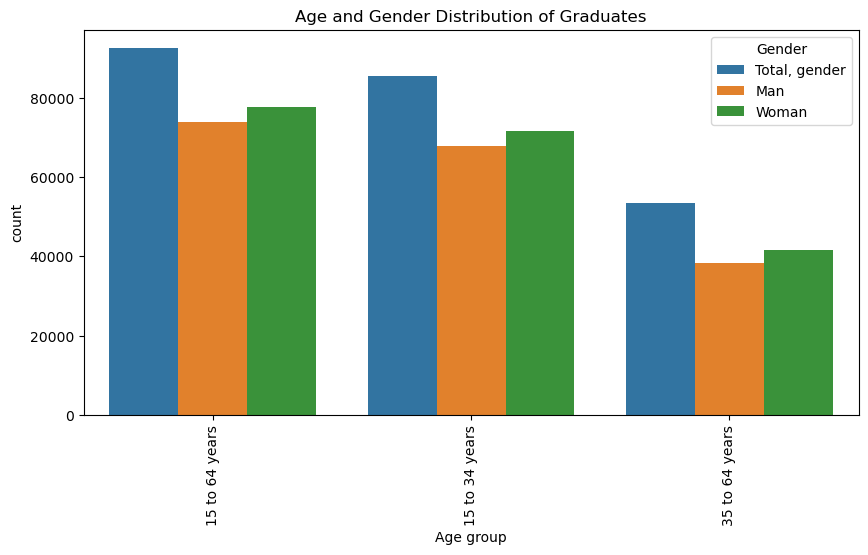

In [84]:
# Age Group Gender Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='Age group', hue='Gender')
plt.title('Age and Gender Distribution of Graduates')
plt.xticks(rotation=90)
plt.show()


A breakdown of the number of graduates by age group and gender could be insightful for policymakers and educational institutions.

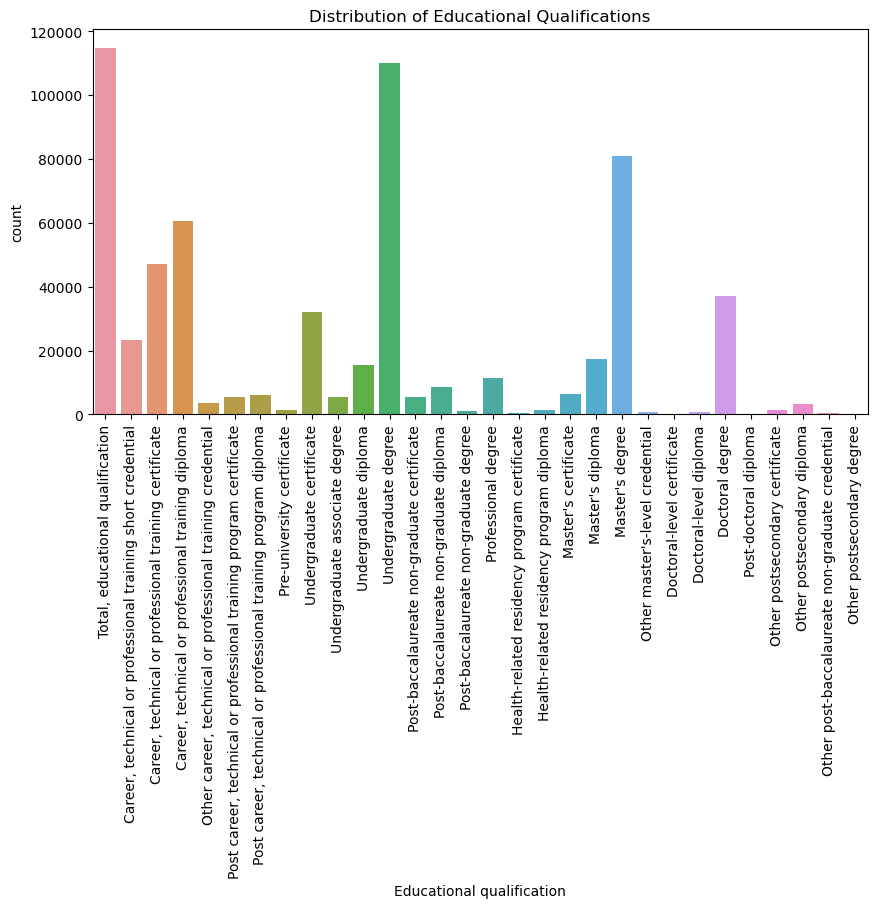

In [85]:
# Educational Qualification Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='Educational qualification')
plt.title('Distribution of Educational Qualifications')
plt.xticks(rotation=90)
plt.show()


This bar plot can help recruiters and education-related organizations understand the distribution of educational qualifications.

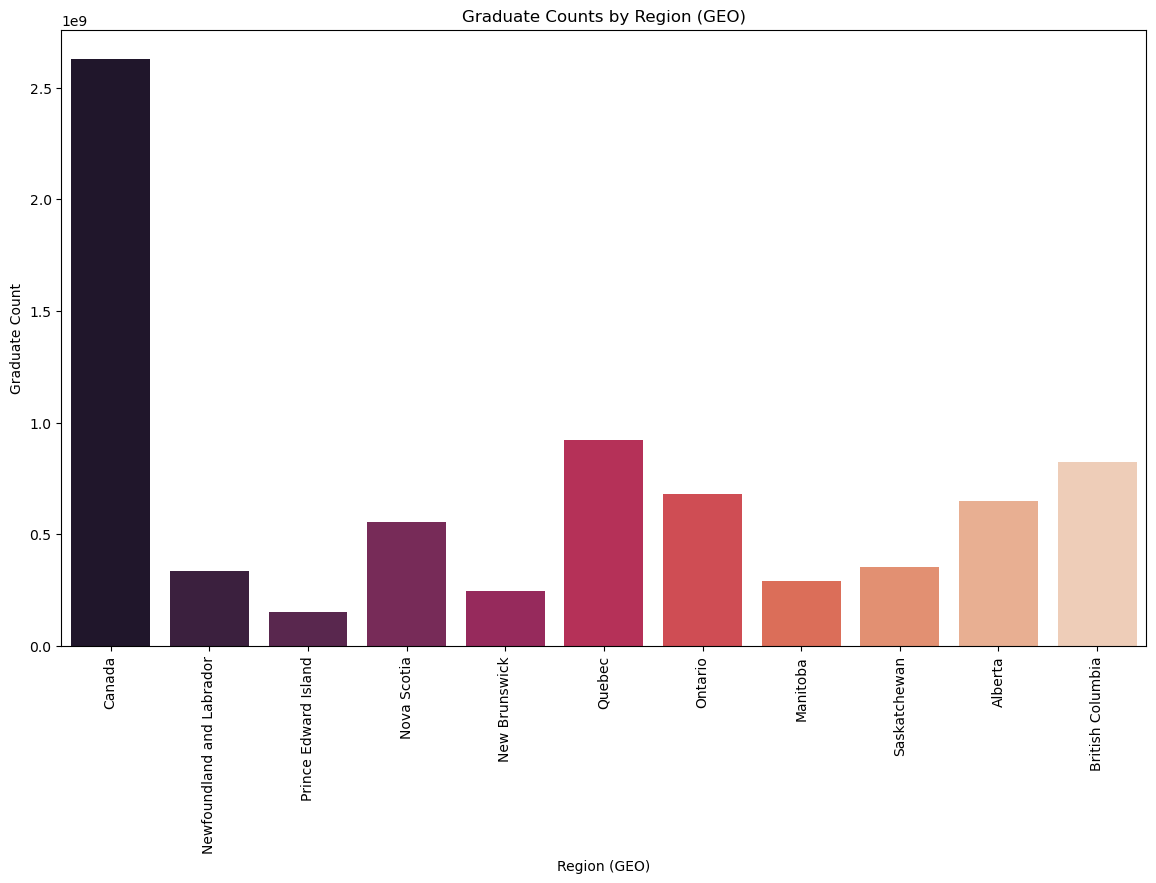

In [ ]:
# Graduate counts by region (GEO)
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned, x='GEO', y='VALUE', estimator=sum, errorbar=None, palette='rocket')
plt.title('Graduate Counts by Region (GEO)')
plt.xlabel('Region (GEO)')
plt.ylabel('Graduate Count')
plt.xticks(rotation=90)
plt.show()


In [87]:
print(df_cleaned.columns)


Index(['REF_DATE', 'GEO', 'Educational qualification', 'Field of study',
       'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'VALUE'],
      dtype='object')


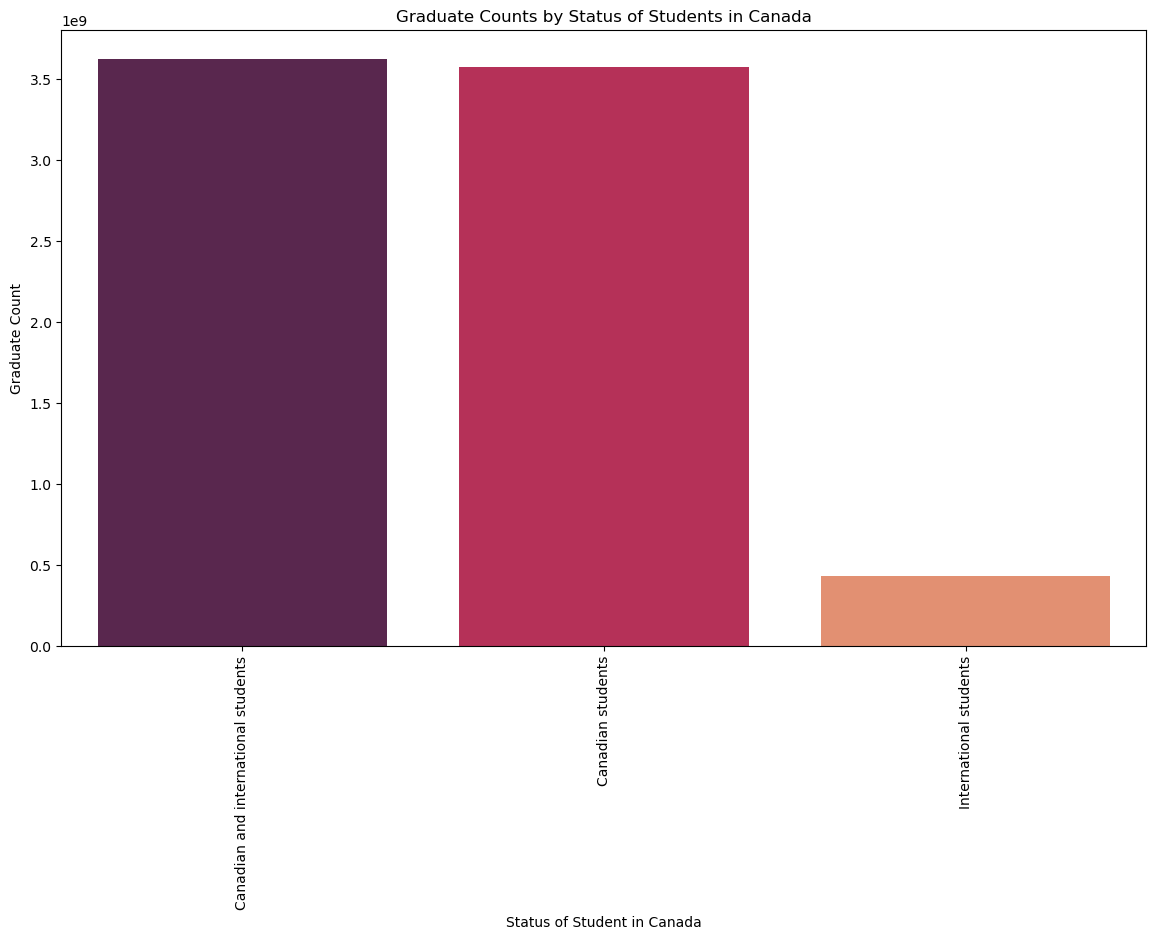

In [88]:
# Graduate counts by Status of Student in Canada
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned, x='Status of student in Canada', y='VALUE', estimator=sum, errorbar=None, palette='rocket')
plt.title('Graduate Counts by Status of Students in Canada')
plt.xlabel('Status of Student in Canada')
plt.ylabel('Graduate Count')
plt.xticks(rotation=90)
plt.show()


The chart shows the number of students graduate count per status of the student can be used by the Governement

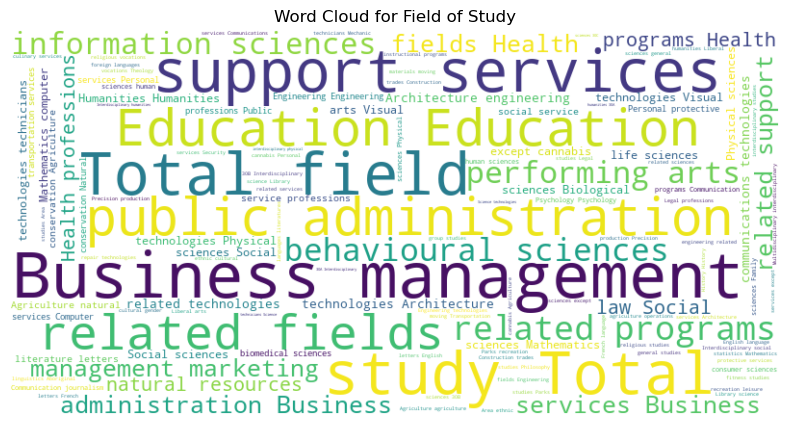

In [89]:
from wordcloud import WordCloud

text = " ".join(df_cleaned['Field of study'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Field of Study")
plt.show()


The word cloud can be used by institutions and employers to know the industry with many graduates and strategize

  ## PART 2

### Key Takeaways from Shingai Manjengwa's Session

One of the key insights I gained from Shingai Manjengwa’s session was the importance of using AI to improve efficiency in deriving data-driven decisions, rather than relying on manual and repetitive methods. AI enables faster, more accurate decision-making, providing a clear edge over traditional approaches. Additionally, I learned the significance of defining and understanding your objective function. Having a well-defined objective is essential for determining whether to maximize, minimize, or optimize a particular aspect of a model or decision process. Equally important is being aware of the constraints in place, as they shape the feasible solutions and guide the optimization process.

Furthermore, it was emphasized that AI and analytics should always be aligned with our values and ethical standards. It’s critical to use these tools responsibly, ensuring that they serve the greater good and contribute to more effective outcomes. I also learned about the Council-AI package, which is revolutionizing the traditional prompting process by simplifying it. By creating AI agents to automate the tedious task of formulating prompts, this tool makes it easier to harness the power of AI. 

Overall, my biggest takeaway was the importance of making decisions based on data rather than relying on intuition alone. Understanding the objective function and constraints is key to improving models. As AI models are designed to replicate real world scenarios, they are not perfect, and continuous evolution is necessary. By adopting AI agents to automate tasks and streamline processes, we can make our work more efficient and adapt to evolving trends in technology.